
###### Name : Shivani Parekh
###### Domain : Data Science and Business Analytics
###### Organization : Sparks Foundation
###### Task 3 : Exploratory Data Analysis - Retail
###### LinkedIn Profile : https://www.linkedin.com/in/shivani-parekh-/
###### Youtube Link: https://youtu.be/aogQbnnJTXQ

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
superstore= pd.read_csv("D:\\sparksfoundation\\SampleSuperstore.csv")

### Get Information about data.

In [3]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
superstore.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
superstore.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
superstore["Postal Code"]=superstore["Postal Code"].astype(object)

In [8]:
superstore.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Finding Correlation between Features

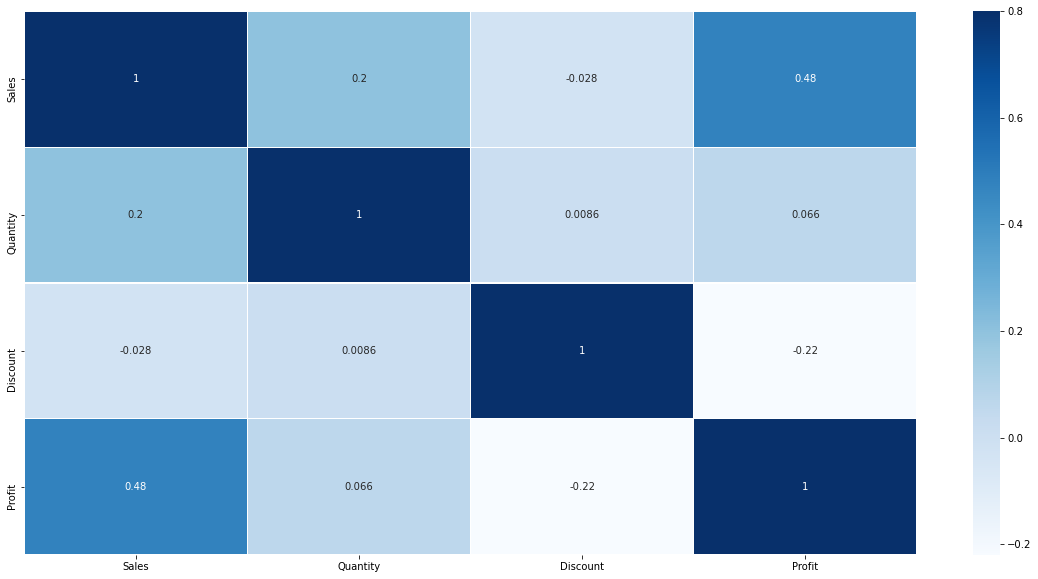

In [9]:
corrmat = superstore.corr()
f, ax = plt.subplots(figsize=(20, 10))
colormap = plt.cm.Blues
sns.heatmap(corrmat, linewidths=0.2, cmap = colormap, linecolor = 'White',vmax=0.8, annot=True)

--As we can see from heatmap that sales and profit are positively correlated.

--Discount and Profit are negatively correlated.

--And also Discount and Sales are negatively correlated.

In [10]:
superstore["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
superstore["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [12]:
superstore["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [13]:
superstore["Country"].unique()

array(['United States'], dtype=object)

Since this dataset has only one country that is US we will remove the country column.

In [14]:
superstore.drop(["Country"],axis=1,inplace=True)

In [15]:
superstore.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
superstore["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [17]:
superstore["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

# 1. Plotting Maximum count for Region,Category,ShipMode & Segment. 

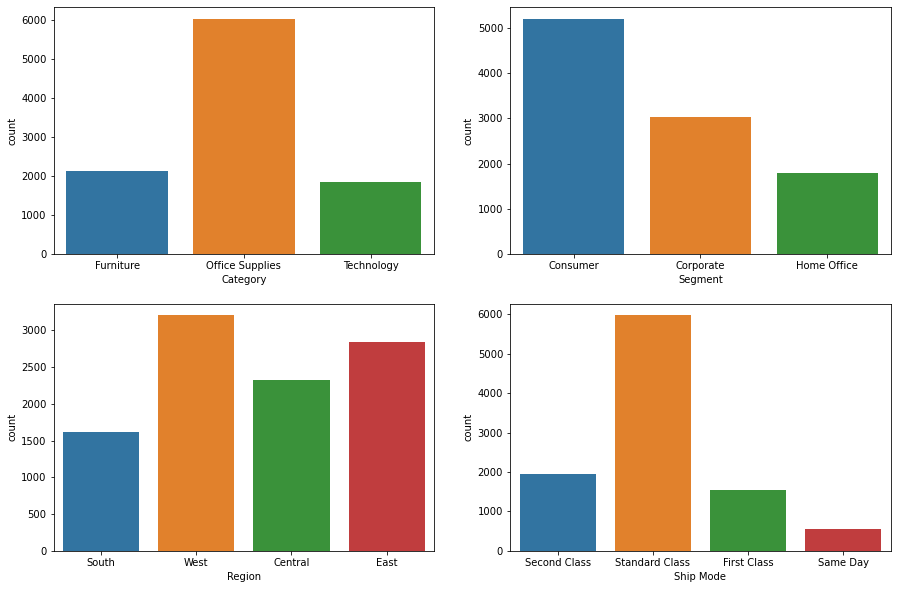

In [18]:
fig,axs=plt.subplots(2,2,figsize=(15, 10))
sns.countplot(x=superstore["Category"],data=superstore,ax=axs[0,0])
sns.countplot(x=superstore["Segment"],data=superstore,ax=axs[0,1])
sns.countplot(x=superstore["Region"],data=superstore,ax=axs[1,0])
sns.countplot(x=superstore["Ship Mode"],data=superstore,ax=axs[1,1])

Office supplies category , Consumer segment , West Region and Standard Shipmode has Maximum sales count .

# 2.Plotting count statewise

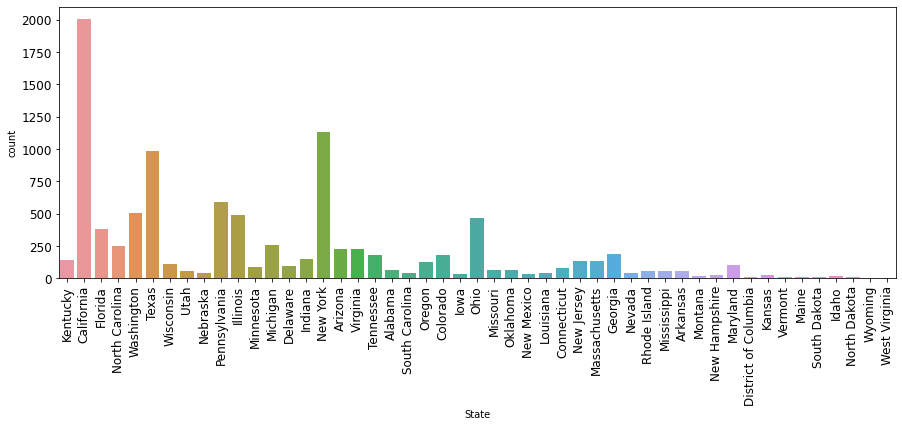

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x=superstore["State"],data=superstore)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 3.Plotting Profit and Sales regionwise

In [20]:
rwps=superstore.groupby("Region")["Profit","Sales"].sum()
rwps.reset_index(inplace=True)
rwps

,Region,Profit,Sales
0,Central,39706.3625,501239.8908
1,East,91522.7800,678781.2400
2,South,46749.4303,391721.9050
3,West,108418.4489,725457.8245


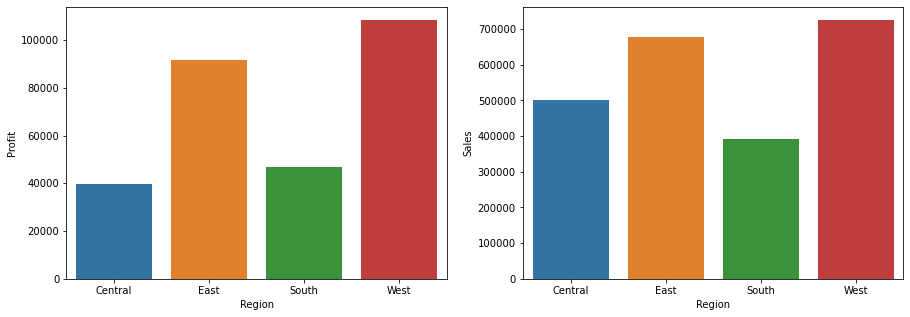

In [21]:
fig,axs=plt.subplots(1,2,figsize=(15, 5))
sns.barplot(x="Region",y="Profit",data=rwps,ax=axs[0])
sns.barplot(x="Region",y="Sales",data=rwps,ax=axs[1])

We can see from the bar graph that WEST Region has highest PROFIT AND SALES.

South region has least sales but its profit is better than Central Region.

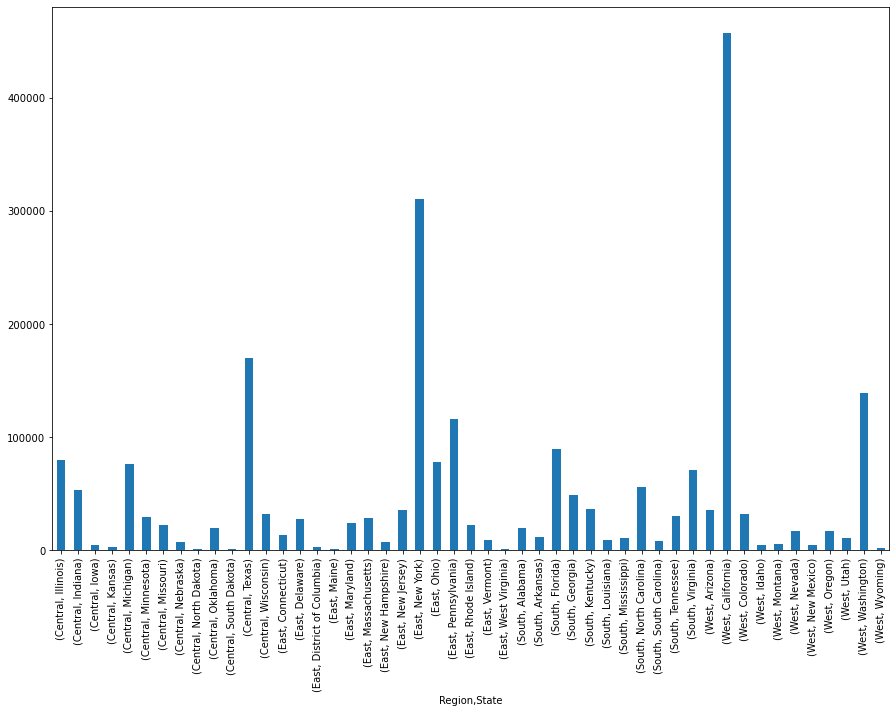

In [22]:
sales_rs=superstore.groupby(["Region",'State'])["Sales"].sum()
sales_rs.plot(kind='bar',figsize=(15,10))

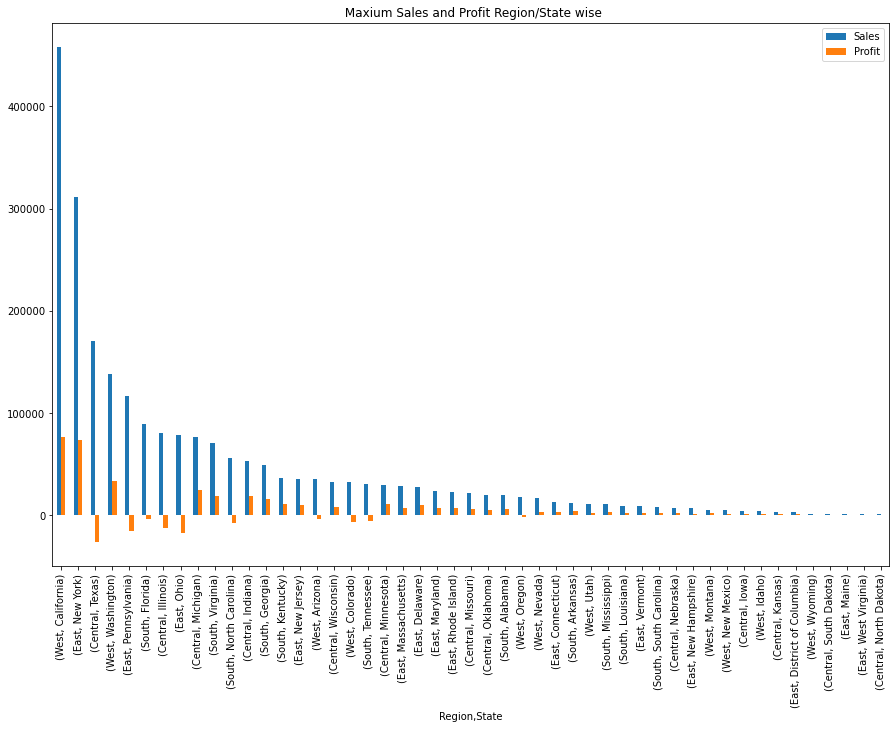

In [23]:
reg_state=superstore.groupby(["Region",'State'])[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False)
reg_state.plot(kind='bar',figsize=(15,10))
plt.title(' Maxium Sales and Profit Region/State wise')
plt.show()

California in the west Region Has the Maximum Sales along New york on 2nd Position We can Clearly see that Profits of both these States are also Highest.

# 4.Plotting count subcategory wise

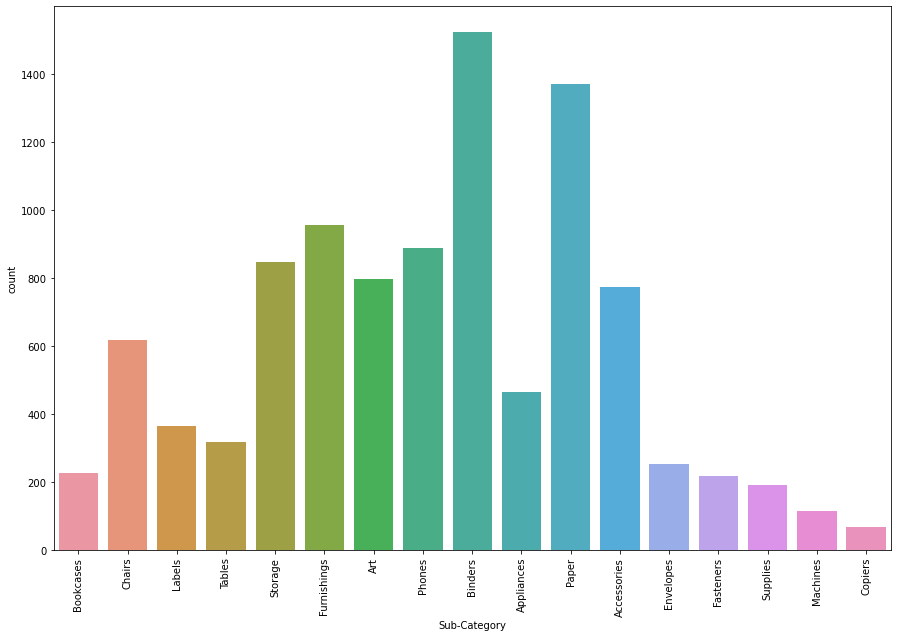

In [24]:
plt.figure(figsize = (15,10))
sns.countplot(x = superstore['Sub-Category'],data = superstore)
plt.xticks(rotation = 90)
plt.show()

Binders have maximum count followed by Paper category .

# 5.Plotting Discount Subcategory wise.

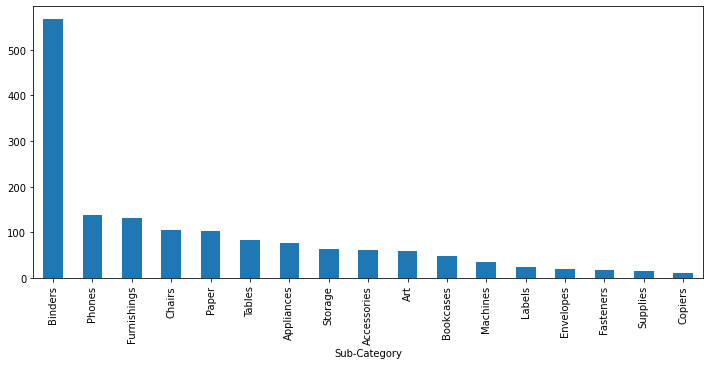

In [25]:
superstore.groupby('Sub-Category')['Discount'].sum().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.show()

Binders has maximum discount

# 6.Plotting Sales and Profit Subcategory wise.

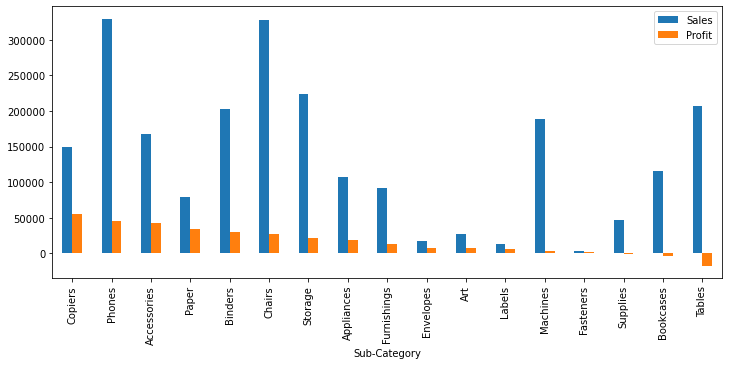

In [26]:
superstore.groupby('Sub-Category')['Sales',"Profit"].sum().sort_values(by="Profit",ascending=False).plot.bar(figsize=(12,5))
plt.show()

Maximum sales have been done in Phones and Chairs category.
Maximum Profit can be seen in Copiers.
Tables category is in Loss.

In [27]:
s=superstore.groupby(['Category','Region'])['Sales'].sum()
#s.reset_index(inplace=True)
s

Category         Region 
Furniture        Central    163797.1638
                 East       208291.2040
                 South      117298.6840
                 West       252612.7435
Office Supplies  Central    167026.4150
                 East       205516.0550
                 South      125651.3130
                 West       220853.2490
Technology       Central    170416.3120
                 East       264973.9810
                 South      148771.9080
                 West       251991.8320
Name: Sales, dtype: float64

# 7.Regionwise plotting sales for different Categories

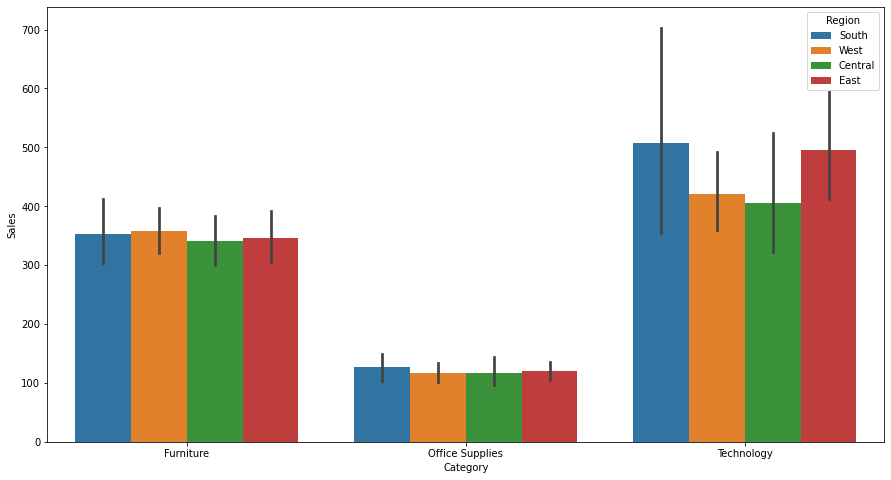

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x="Category",y="Sales",hue="Region", data=superstore)
plt.show()

# 8.Category wise Sales and Profit of different Sub- Categories.

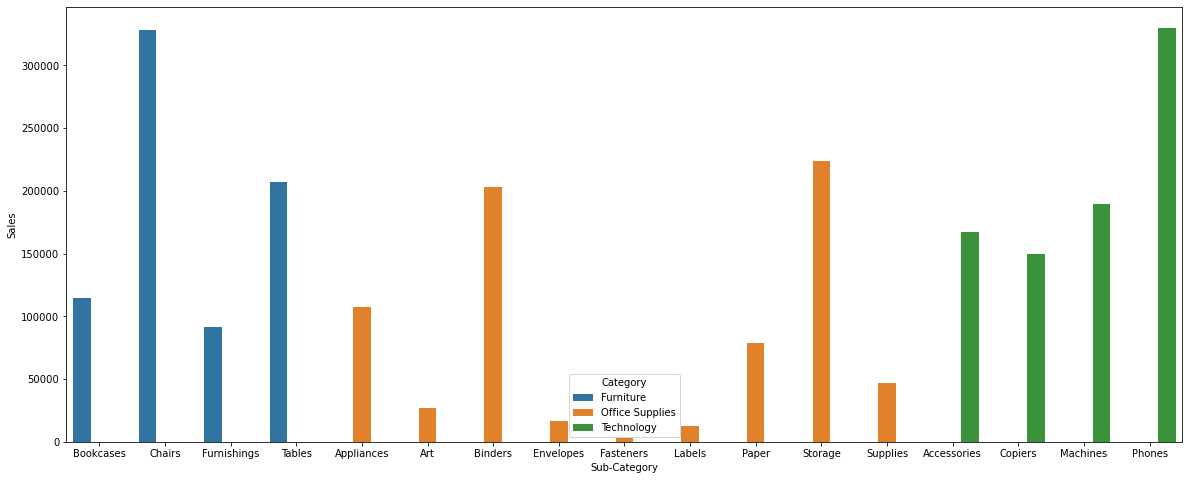

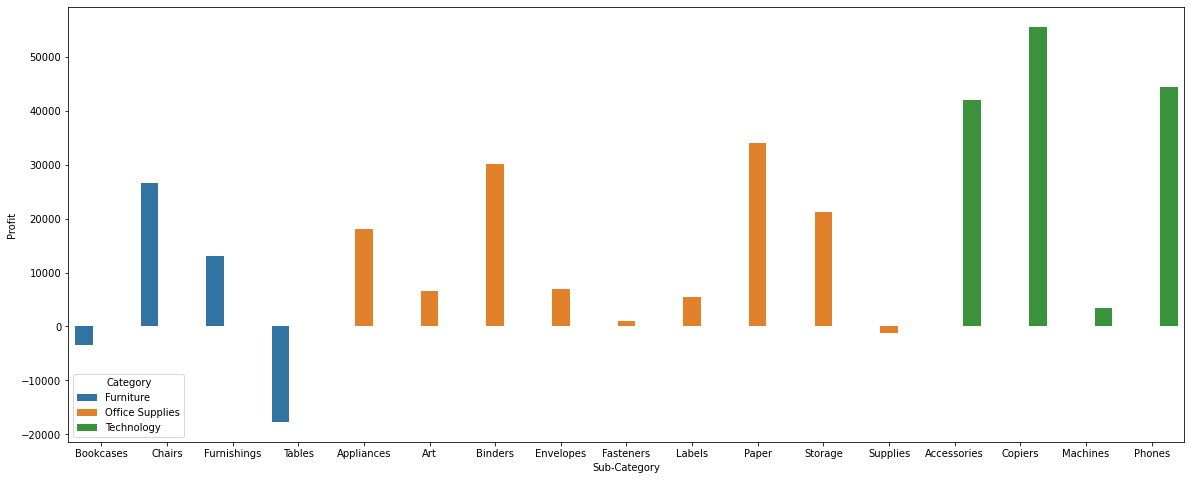

In [29]:
s=superstore.groupby(["Category",'Sub-Category'])["Sales","Profit"].sum()
s.reset_index(inplace=True)
plt.figure(figsize=(20,8))
sns.barplot(y="Sales",x="Sub-Category",hue="Category",data=s)
plt.figure(figsize=(20,8))
sns.barplot(y="Profit",x="Sub-Category",hue="Category",data=s)

# 9.Regionwise plotting sales for different Sub-categories.

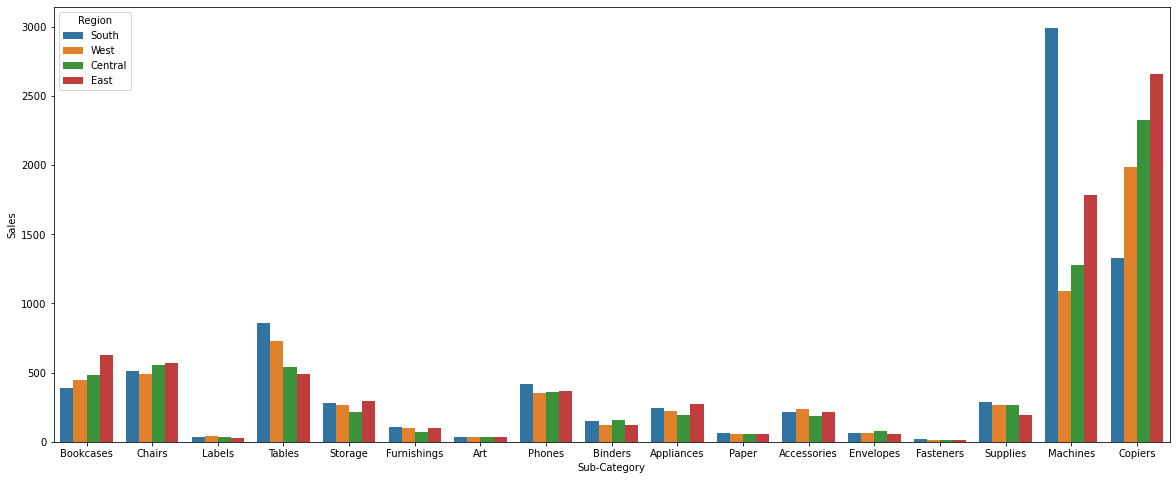

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x="Sub-Category",y="Sales",hue="Region", data=superstore,ci=None)
plt.show()

# Observations and Suggestions

From this analysis , I conclude that-
1. Office supplies category , Consumer segment , West Region and Standard Shipmode has Maximum sales count .
2. California has max sales count and Newyork has 2nd max sales count.
3. West and East regions have maximum profit and sales respectively.
4. Maximum sales count have been done in Binder and Paper subcategory.
5. Binders subcategory has maximum discount given.
6. Maximum sales have been done in Phones and Chairs category and Maximum Profit can be seen in Copiers. Tables category is in Loss.
7. Overall Technology has maximum sales and South and West Region has maximum sales in Technology category.
8. (i) Chairs in Furniture Category and Phones in Technology Category and Storage in Office supplies has maximum sales.
    (ii) Copiers in Technology,Paper in Office supplies and Chairs in Furniture has Maximum Profit.
9. Machines in south region has maximum sales.

1. Regionwise --> Store shall focus on improving sales and Profit in South and Central region overall.
2. Categorywise --> office supplies need to be sold more for more profit and sales so schemes in that category would encourage more sales for office category.
3. Home Office and Corporate segments has less sales count so the store can improve sales and profit in these segments.

# Thank You !!!